# Homework 01

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
import pandas as pd
import scipy.stats as stats

### 第一題

In [95]:
# Load data
percent_returning=np.array([[74],[66],[81],[52],[73],[62],[52],[45],[62],[46],[60],[46],[38]])
new_adults=np.array([[5],[6],[8],[11],[12],[15],[16],[17],[18],[18],[19],[20],[20]])

# Fit line (Least Squared method)
model_bird = linear_model.LinearRegression(fit_intercept=True)
model_bird.fit(percent_returning,new_adults)
b=model_bird.coef_
a=model_bird.intercept_

# Calculate mean,covariance,and variance
x_mean=np.mean(percent_returning)
y_mean=np.mean(new_adults)
n=13
total=0
x_sq=0
y_sq=0
for i in range(0,n):
    t1=percent_returning[i]-x_mean
    t2=new_adults[i]-y_mean
    total=total+t1*t2
    x_sq=x_sq+t1*t1
    y_sq=y_sq+t2*t2
cov_xy=total/n
var_x=x_sq/n
var_y=y_sq/n

#calculate TSS、SSE
TSS=y_sq
SSE=0
for i in range(0,n):
    SSE=SSE+(new_adults[i]-a-b*percent_returning[i])**2
MSE=SSE/(n-2)


a. Describe the pattern of the data

Text(0, 0.5, 'number of new adults')

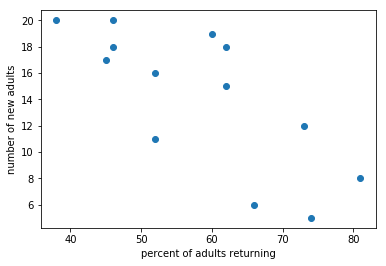

In [96]:
plt.scatter(percent_returning,new_adults)
plt.xlabel('percent of adults returning')
plt.ylabel('number of new adults')

b. Any possible outliers? <br>
- Studentized residuals<br>
https://newonlinecourses.science.psu.edu/stat501/node/339/ <br>
$r_{i}=\frac{e_{i}}{s(e_{i})}=\frac{e_{i}}{\sqrt{MSE(1-h_{ii})}}$ <br>
An observation with an internally studentized residual that is larger than 3 (in absolute value) is generally deemed an outlier.

In [130]:
arr = np.empty((0,2))
for i in range(0,n):
    temp=percent_returning[i][0]
    arr = np.append(arr, np.array([[1,temp]]), axis=0)
tmp=np.dot(arr.transpose(),arr)
tmp=np.linalg.inv(tmp)
hat_m=np.dot(np.dot(arr,tmp),arr.transpose())
stud_res=np.empty((0,1))
print('pc_re','new_ad','  stud_res','            res','                 hii')
for i in range(0,n):
    predict=a+b*percent_returning[i]
    res = new_adults[i]-predict
    stud_res= np.append(stud_res,(res)/((MSE*(1-hat_m[i][i]))**0.5))
    print(percent_returning[i],' ',new_adults[i],'  ',stud_res[i],' ',res,'  ',hat_m[i][i])
    

pc_re new_ad   stud_res             res                  hii
[74]   [5]    -1.3517945169970782   [[-4.43656125]]    0.19892067325835905
[66]   [6]    -1.6932018747346413   [[-5.86874481]]    0.10653634236546153
[81]   [8]    0.23063819819830747   [[0.69159937]]    0.331270284549777
[52]   [11]    -1.469974792647896   [[-5.12506604]]    0.09596950713261365
[73]   [12]    0.6820821039446255   [[2.2594158]]    0.1839384104460714
[62]   [15]    0.5456758392091983   [[1.91516341]]    0.08389312400935911
[52]   [16]    -0.03587152412915061   [[-0.12506604]]    0.09596950713261365
[45]   [17]    -0.373523736374447   [[-1.25322666]]    0.16280473998037567
[62]   [18]    1.4004475575448183   [[4.91516341]]    0.08389312400935911
[46]   [18]    0.015028114570857135   [[0.05079629]]    0.15031323118725937
[60]   [19]    1.5076595256446628   [[5.30711752]]    0.0784587516038945
[46]   [20]    0.6067294219981719   [[2.05079629]]    0.15031323118725937
[38]   [20]    -0.1223813066545974   [[-0.38138

<function matplotlib.pyplot.show(*args, **kw)>

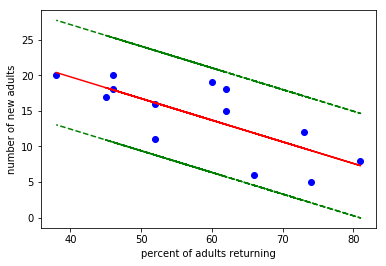

In [134]:
plt.scatter(percent_returning,new_adults,color='blue',marker='o')
x = percent_returning
plt.plot(x,model_bird.predict(x),color='red')
plt.plot(x, model_bird.predict(x) + 2*(MSE**0.5), linestyle='dashed',color='green')
plt.plot(x, model_bird.predict(x) - 2*(MSE**0.5), linestyle='dashed',color='green')
plt.xlabel('percent of adults returning')
plt.ylabel('number of new adults')
plt.show

c. Pearson’s correlation

In [135]:
print(cov_xy,var_x,var_y)
temp = (var_x*var_y)**0.5
p=cov_xy/temp
pearson=stats.pearsonr(percent_returning, new_adults) 
#return：(Pearson’s correlation coefficient,2-tailed p-value)
print(p,pearson)

[-47.66863905] [156.79289941] [25.86982249]
[-0.7484673] (array([-0.7484673]), array([0.00324806]))


d.Fit a least-squares line

In [137]:
print("y=a+bX")
b=p*(var_y**0.5)/(var_x**0.5)
a=y_mean-b*x_mean
print("b係數：",model_bird.coef_,b)  #係數 b
print("a截距：",model_bird.intercept_,a)  #截距 a


y=a+bX
b係數： [[-0.30402295]] [-0.30402295]
a截距： [31.93425919] [31.93425919]


<function matplotlib.pyplot.show(*args, **kw)>

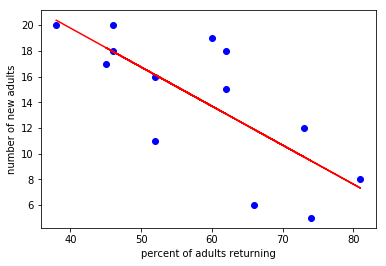

In [138]:
plt.scatter(percent_returning,new_adults,color='blue',marker='o')
plt.plot(percent_returning,model_bird.predict(percent_returning),color='red')
plt.xlabel('percent of adults returning')
plt.ylabel('number of new adults')
plt.show

e. Compute the measure of $R^2$

In [139]:
r_squared = model_bird.score(percent_returning,new_adults)
r_sq=1-SSE/TSS
print(TSS,SSE,r_sq)
print("R平方：",r_squared)

[336.30769231] [[147.90701185]] [[0.5602033]]
R平方： 0.5602033041973098


### 第二題

In [142]:
# Load data
soda=np.array([[35.1],[35.7],[46.2],[47.4],[47.9],[49.7],[49.3]])
milk=np.array([[27.6],[26.7],[25.7],[23.9],[23.0],[22.9],[23.3]])
# Fit line (Least Squared method)
model_drink = linear_model.LinearRegression(fit_intercept=True)
model_drink.fit(soda,milk)
b=model_drink.coef_
a=model_drink.intercept_

# Calculate mean,covariance,and variance
x_mean=np.mean(soda)
y_mean=np.mean(milk)
n=7
cov_xy=0
x_var=0
y_var=0
for i in range(0,n):
    cov_xy=cov_xy+(soda[i]-x_mean)*(milk[i]-y_mean)
    x_var=x_var+(soda[i]-x_mean)**2
    y_var=y_var+(milk[i]-y_mean)**2
cov_xy=cov_xy/n
x_var=x_var/n
y_var=y_var/n

#calculate SSE、MSE
SSE=0
for i in range(0,n):
    SSE=SSE+(milk[i]-a-b*soda[i])**2
MSE=SSE/(n-2)


a. Describe the pattern of the data

Text(0, 0.5, 'Milk')

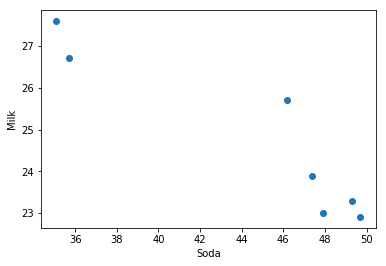

In [143]:
plt.scatter(soda,milk)
plt.xlabel('Soda')
plt.ylabel('Milk')

b. Any possible outlier?

In [148]:
arr = np.empty((0,2))
for i in range(0,n):
    temp=soda[i][0]
    arr = np.append(arr, np.array([[1,temp]]), axis=0)
tmp=np.dot(arr.transpose(),arr)
tmp=np.linalg.inv(tmp)
hat_m=np.dot(np.dot(arr,tmp),arr.transpose())
stud_res=np.empty((0,1))
print('soda','    milk','     stud_res','            res','                 hii')
for i in range(0,n):
    predict=a+b*soda[i]
    res = milk[i]-predict
    stud_res= np.append(stud_res,(res)/((MSE*(1-hat_m[i][i]))**0.5))
    print(soda[i],' ',milk[i],'  ',stud_res[i],' ',res,'  ',hat_m[i][i])
    

soda     milk      stud_res             res                  hii
[35.1]   [27.6]    0.4115762515875641   [[0.22824539]]    0.5107292028196339
[35.7]   [26.7]    -0.8666791818413605   [[-0.50252642]]    0.46513158682097383
[46.2]   [25.7]    2.0023311554832235   [[1.45896693]]    0.1553729789245668
[47.4]   [23.9]    -0.003586368752857462   [[-0.00257668]]    0.17878214871285364
[47.9]   [23.]    -1.0686695028033364   [[-0.76155319]]    0.19209641322689802
[49.7]   [22.9]    -0.5179388849088189   [[-0.35386862]]    0.25736922101080756
[49.3]   [23.3]    -0.0965179711503019   [[-0.06668741]]    0.24051844848426884


<function matplotlib.pyplot.show(*args, **kw)>

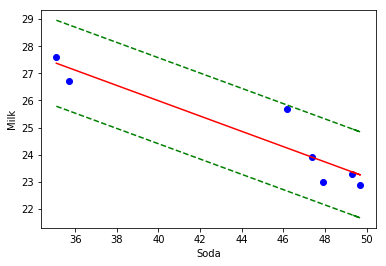

In [149]:
plt.scatter(soda,milk,color='blue',marker='o')
plt.plot(soda,model_drink.predict(soda),color='red')
plt.plot(soda, model_drink.predict(soda) + 2*(MSE**0.5), linestyle='dashed',color='green')
plt.plot(soda, model_drink.predict(soda) - 2*(MSE**0.5), linestyle='dashed',color='green')
plt.xlabel('Soda')
plt.ylabel('Milk')
plt.show

c. Compute Pearson's correlation

In [150]:
pearson=stats.pearsonr(soda, milk)
p=cov_xy/((x_var*y_var)**0.5)
print(x_mean,y_mean,cov_xy,x_var,y_var)
print(p,pearson)

44.471428571428575 24.72857142857143 [-9.61918367] [34.10489796] [3.16204082]
[-0.92628814] (array([-0.92628814]), array([0.00272225]))


d .Compute Kendall's tau

In [151]:
tau,p_value=stats.kendalltau(soda,milk)
t=1/21-20/21
print(t,tau)

-0.9047619047619047 -0.9047619047619049


e. Fit a least-squares line

In [152]:
y_s=y_var**0.5
x_s=x_var**0.5
b=p*y_s/x_s
a=y_mean-b*x_mean
print(y_s,x_s)
print("b係數：",model_drink.coef_,b)  #係數 b
print("a截距：",model_drink.intercept_,a)  #截距 a
print('Y=',model_drink.intercept_[0],'+',model_drink.coef_[0][0],'X')

[1.77821282] [5.83993989]
b係數： [[-0.28204699]] [-0.28204699]
a截距： [37.27160382] [37.27160382]
Y= 37.27160381535958 + -0.28204698588987176 X


<function matplotlib.pyplot.show(*args, **kw)>

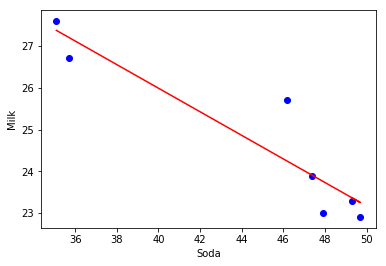

In [161]:
plt.scatter(soda,milk,color='blue',marker='o')
plt.plot(soda,model_drink.predict(soda),color='red')
plt.xlabel('Soda')
plt.ylabel('Milk')
plt.show